In [1]:
import tensorflow 

In [2]:
import tensorflow as tf 

In [3]:
print(tf.__version__)

2.3.0


In [4]:
from tensorflow import keras

#### Working with Mnist Dataset

In [5]:
from tensorflow.keras.datasets import mnist

In [12]:
df = tensorflow.keras.datasets.fashion_mnist

In [13]:
dir(df)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [14]:
type(df)

module

In [15]:
(X_train,y_train) , (X_test,y_test) = df.load_data()

4423680/4422102 [==============================] - 125s 28us/step


In [17]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [19]:
X_test.shape , y_train.shape

((10000, 28, 28), (60000,))

In [25]:
y_train[0]

9

In [29]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [30]:
labels = ["top","Trouser","Pullover","Dress","coat","sandal","shirt","sneaker","Bag","Ankle Boot"]

In [31]:
labels

['top',
 'Trouser',
 'Pullover',
 'Dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'Bag',
 'Ankle Boot']

### Visualization

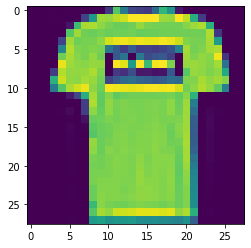

In [37]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])


In [35]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

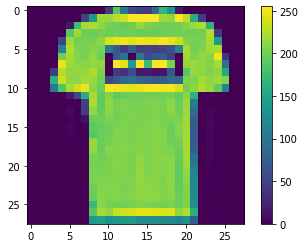

In [38]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])
plt.colorbar()

### Scalling down the values 

In [39]:
X_train = X_train / 255.0
X_test = X_test / 255.0

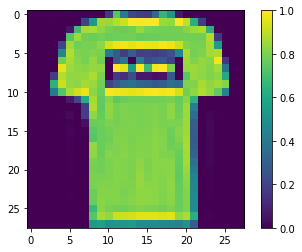

In [41]:
plt.imshow(X_train[1])
plt.colorbar()

### Build Tensorflow Model

In [46]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation
from tensorflow.keras.activations import sigmoid,relu,softmax

In [47]:
model = Sequential()

In [48]:
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10 , activation = 'softmax'))

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


### Model compilation

In [53]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [54]:
model.fit(X_train , y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5005 - accuracy: 0.8222: 1s - loss: 0.5303 - accu - ETA: 1s - loss: 0.523
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3653 - accuracy: 0.8672
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3300 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3086 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2914 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2773 - accuracy: 0.8968: 0s - loss: 0.2770 - accuracy: 0.
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2670 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2553 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2454 - accuracy: 0.908

In [55]:
test_loss , test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3410 - accuracy: 0.8849


In [57]:
test_loss , test_acc

(0.34096407890319824, 0.8848999738693237)

In [58]:
model.fit(X_train , y_train,validation_data = (X_test,y_test),epochs = 10,batch_size = 64)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2059 - accuracy: 0.9214 - val_loss: 0.3305 - val_accuracy: 0.8878
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2030 - accuracy: 0.9220 - val_loss: 0.3410 - val_accuracy: 0.8857
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1996 - accuracy: 0.9248 - val_loss: 0.3260 - val_accuracy: 0.8930
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1936 - accuracy: 0.9268 - val_loss: 0.3556 - val_accuracy: 0.8850
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1867 - accuracy: 0.9287 - val_loss: 0.3343 - val_accuracy: 0.8892
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1816 - accuracy: 0.9300 - val_loss: 0.3402 - val_accuracy: 0.8934
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1793 - accuracy: 0.9316 - val_loss: 0.3405 - val_accuracy: 0.8849
Epoch 

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
y_test_pred = model.predict_classes(X_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [67]:
accuracy_score(y_test, y_test_pred)

0.8923

### checking the predictions 

In [70]:
checking = model.predict(X_test)

In [72]:
checking[0]

array([1.5377634e-14, 1.9643431e-11, 1.7618891e-09, 2.8053002e-13,
       4.0613589e-12, 1.9801010e-07, 5.2643997e-11, 7.2116585e-05,
       2.9258825e-13, 9.9992764e-01], dtype=float32)

In [73]:
import numpy as np
np.argmax(checking[0])

9